# 통계청의 출생 데이터를 활용한 Pandas 기초

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Seaborn 한글 사용법

In [2]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

## 데이터 읽어오기
- DataFrame

In [3]:
df = pd.read_csv("../dataset/preprocessing/시군구_성_월별_출생_20220120003026.csv", encoding="cp949")

In [4]:
df.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2020. 09.2,2020. 10,2020. 10.1,2020. 10.2,2020. 11,2020. 11.1,2020. 11.2,2020. 12,2020. 12.1,2020. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11552,21884,11172,10712,20054,10300,9754,19641,10028,9613
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2024,3870,2021,1849,3469,1789,1680,3428,1760,1668
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,649,1185,571,614,1041,550,491,1025,529,496
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,459,901,460,441,771,382,389,721,364,357


In [5]:
df.tail()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2020. 09.2,2020. 10,2020. 10.1,2020. 10.2,2020. 11,2020. 11.1,2020. 11.2,2020. 12,2020. 12.1,2020. 12.2
14,전라북도,2579,1362,1217,2261,1150,1111,2364,1186,1178,...,367,642,324,318,636,317,319,644,318,326
15,전라남도,2685,1413,1272,2547,1286,1261,2457,1246,1211,...,393,751,381,370,725,371,354,688,337,351
16,경상북도,3362,1802,1560,3257,1751,1506,3343,1754,1589,...,510,1066,553,513,945,469,476,863,432,431
17,경상남도,4020,2171,1849,3796,2003,1793,4021,2122,1899,...,773,1318,653,665,1189,598,591,1166,627,539
18,제주특별자치도,734,373,361,737,386,351,750,419,331,...,166,307,159,148,276,134,142,305,165,140


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 865 entries, 시군구별 to 2020. 12.2
dtypes: object(865)
memory usage: 128.5+ KB


## 깔끔한 데이터

In [7]:
df = df.melt(id_vars="시군구별")
df = df[df["시군구별"] != "시군구별"].copy()
df

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
...,...,...,...
16411,전라북도,2020. 12.2,326
16412,전라남도,2020. 12.2,351
16413,경상북도,2020. 12.2,431
16414,경상남도,2020. 12.2,539


## 데이터 전처리

In [8]:
df["연도"] = df["variable"].str.split(".", expand=True)[0]
df["월"] = df["variable"].str.split(".", expand=True)[1]
df["성별"] = df["variable"].str.split(".", expand=True)[2]
df

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None
...,...,...,...,...,...,...
16411,전라북도,2020. 12.2,326,2020,12,2
16412,전라남도,2020. 12.2,351,2020,12,2
16413,경상북도,2020. 12.2,431,2020,12,2
16414,경상남도,2020. 12.2,539,2020,12,2


In [9]:
df["성별"] = df["성별"].fillna("전체")
df["성별"] = df["성별"].replace("1", "남자").replace("2", "여자")
df

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체
...,...,...,...,...,...,...
16411,전라북도,2020. 12.2,326,2020,12,여자
16412,전라남도,2020. 12.2,351,2020,12,여자
16413,경상북도,2020. 12.2,431,2020,12,여자
16414,경상남도,2020. 12.2,539,2020,12,여자


In [10]:
df = df.rename(columns={"variable": "기간", "value":"출생아수"})
df

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체
...,...,...,...,...,...,...
16411,전라북도,2020. 12.2,326,2020,12,여자
16412,전라남도,2020. 12.2,351,2020,12,여자
16413,경상북도,2020. 12.2,431,2020,12,여자
16414,경상남도,2020. 12.2,539,2020,12,여자


In [11]:
df["성별"].value_counts()

전체    5184
남자    5184
여자    5184
Name: 성별, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15552 entries, 1 to 16415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    15552 non-null  object
 1   기간      15552 non-null  object
 2   출생아수    15552 non-null  object
 3   연도      15552 non-null  object
 4   월       15552 non-null  object
 5   성별      15552 non-null  object
dtypes: object(6)
memory usage: 850.5+ KB


In [13]:
df["출생아수"] = df["출생아수"].replace("-", np.nan).astype(float)
df["월"] = df["월"].astype(int)
df["연도"] = df["연도"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15552 entries, 1 to 16415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    15552 non-null  object 
 1   기간      15552 non-null  object 
 2   출생아수    15012 non-null  float64
 3   연도      15552 non-null  int64  
 4   월       15552 non-null  int64  
 5   성별      15552 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 850.5+ KB


## 데이터 시각화

In [15]:
df_all = df[df["성별"] == "전체"]

In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5184 entries, 1 to 16377
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    5184 non-null   object 
 1   기간      5184 non-null   object 
 2   출생아수    5004 non-null   float64
 3   연도      5184 non-null   int64  
 4   월       5184 non-null   int64  
 5   성별      5184 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 283.5+ KB


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

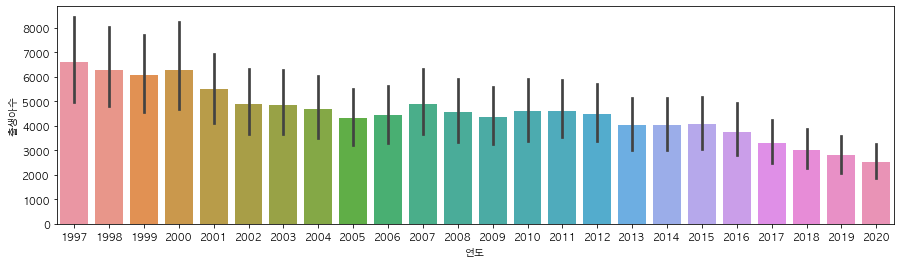

In [17]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x="연도", y="출생아수")

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

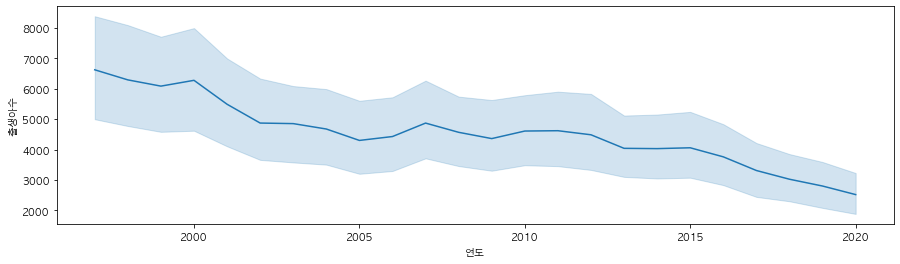

In [18]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x="연도", y="출생아수")

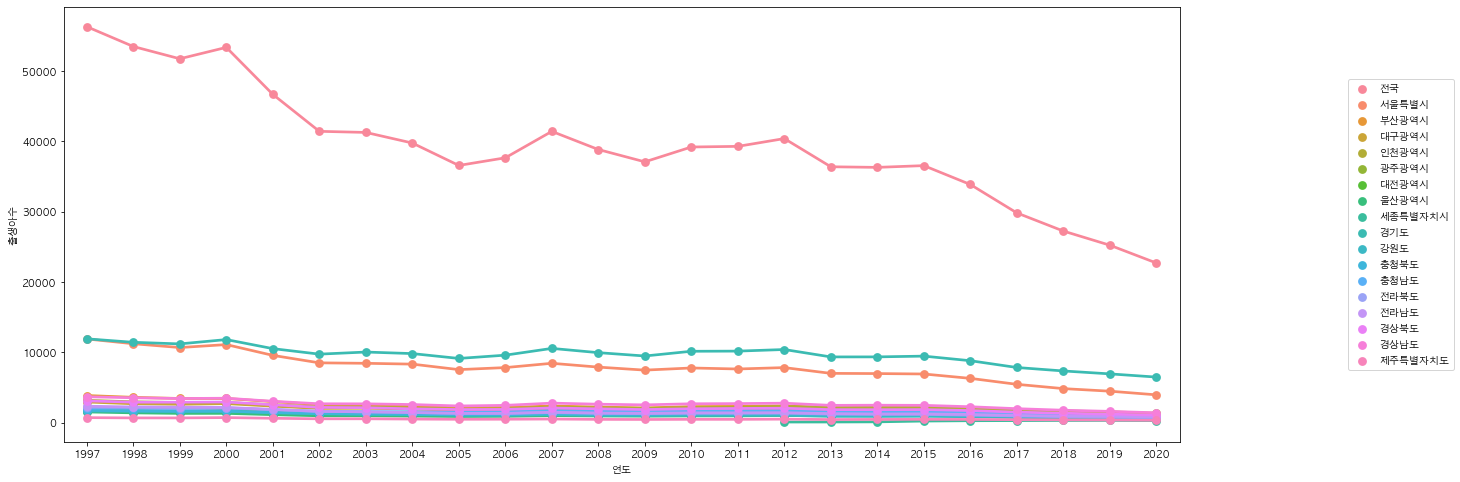

In [19]:
plt.figure(figsize=(20,8))
sns.pointplot(data=df_all, x="연도", y="출생아수", hue="시군구별", ci=None)
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5), ncol=1)

In [20]:
df_local = df[(df["시군구별"] == "전국")]

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

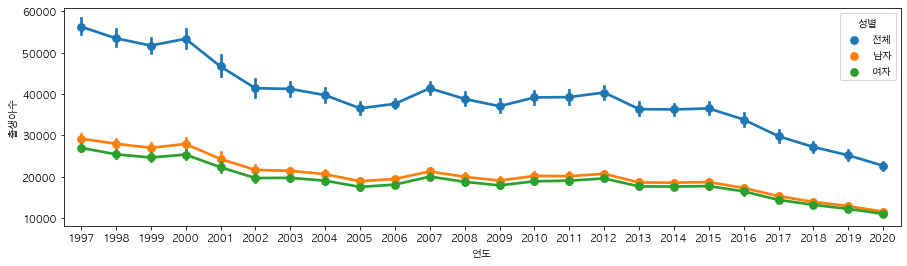

In [21]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x="연도", y="출생아수", hue="성별")